In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.random.rand(10000)
x2 = np.random.rand(10000)

y1 = np.sqrt(-2 * np.log(x1)) * np.cos(2 * np.pi * x2)
y2 = np.sqrt(-2 * np.log(x1)) * np.sin(2 * np.pi * x2)


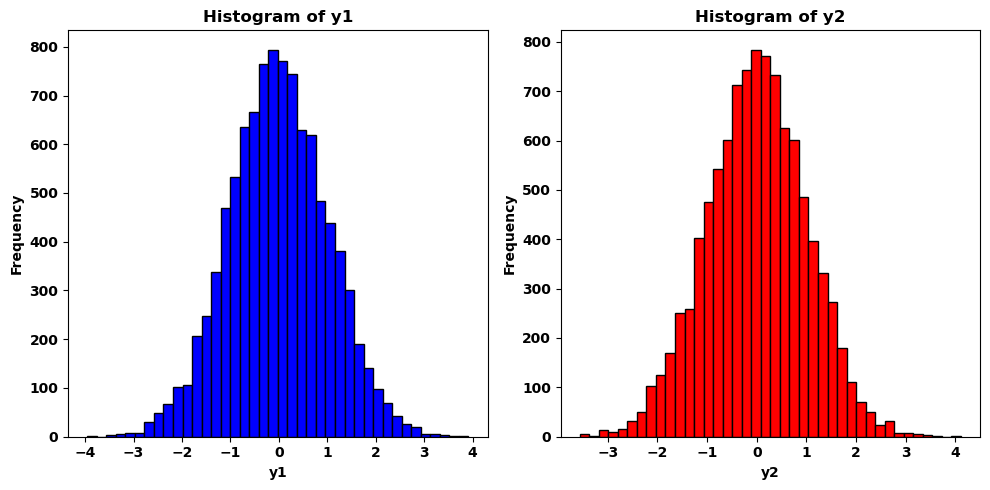

In [2]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(y1, bins=40, color='blue', edgecolor='black')
plt.title('Histogram of y1')
plt.xlabel('y1')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y2, bins=40, color='red', edgecolor='black')
plt.title('Histogram of y2')
plt.xlabel('y2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

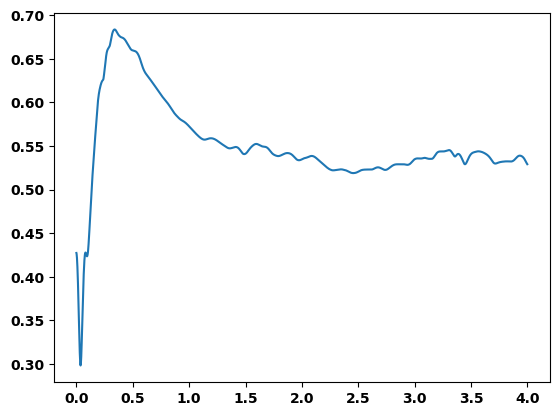

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
h=0.001
x1 = np.random.rand(10000)
x2 = np.random.rand(10000)

y1 = np.sqrt(-2 * np.log(x1)) * np.cos(2 * np.pi * x2)
y2 = np.sqrt(-2 * np.log(x1)) * np.sin(2 * np.pi * x2)
XY = [[(i, j) for j in range (1, 11)] for i in range(1, 11)]
V = np.zeros((10, 10, 2))
for i in range(10):
    for j in range(10):
        V[i][j][0]= y1[10*i+j]
        V[i][j][1]= y2[10*i+j]

def f(i,j, xy):
    XY = xy
    r = 0 
    F_x = 0
    F_y = 0
    for m in range(10):
        for n in range(10):
            r = np.sqrt((XY[i][j][0]-XY[m][n][0])**2+(XY[i][j][1]-XY[m][n][1])**2)
            if(r!=0):
                F_x += 24*(2*r**(-14)-r**(-8))*(XY[i][j][0]-XY[m][n][0])
                F_y += 24*(2*r**(-14)-r**(-8))*(XY[i][j][1]-XY[m][n][1])
    return F_x,F_y
XY1= np.zeros((10,10,2))

for i in range(10):
    for j in range(10):
        XY1[i][j][0] = XY[i][j][0] + h * V[i][j][0] + 0.5* h**2 *f(i,j,XY)[0]
        XY1[i][j][1] = XY[i][j][1] + h * V[i][j][1] + 0.5* h**2 *f(i,j,XY)[1]

timestamps = np.arange(0, 4, h)     
Temperature = []
for time in timestamps:
    temp_arr = np.zeros((10, 10, 2))
    v_sum = 0
    for i in range(10):
        for j in range(10):
            temp_arr[i][j][0] = 2 * XY1[i][j][0] - XY[i][j][0] + h*h*f(i,j,XY)[0]
            temp_arr[i][j][1] = 2 * XY1[i][j][1] - XY[i][j][1] + h*h*f(i,j,XY)[1]
            
            V[i][j][0] = (temp_arr[i][j][0] - XY[i][j][0]) * 0.5 / h
            V[i][j][1] = (temp_arr[i][j][1] - XY[i][j][1]) * 0.5 / h
            v_sum +=np.sqrt(V[i][j][0]**2 + V[i][j][1]**2)
   
    Temperature.append(v_sum / (3*99))
    XY = XY1
    XY1 = temp_arr
   


# print(Temperature)
plt.plot(timestamps, Temperature)
plt.show()